## Supervised Learning Lab 2
### Naive Bayes Classifiers and Linear Models


### Naive Bayes Classifiers

#### BernoulliNaive Bayes
BernouliNB counts how many features are not zero. It is for Binary features only (e.g. Presence or abscence a feature represented by 1 or 0). 


In [1]:
import numpy as np
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [2]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [8]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)
print("Input feature is", X[2:3])
print("The feature has predicted class" , clf.predict(X[2:3]))


Input feature is [[0 0 0 1]]
The feature has predicted class [0]


#### Gaussian Naive Bayes
It is for coninous features and assumes that the distributions of features are Gaussian. 

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
#Split into training and test set equally
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
#train the guassian Naive Bayes
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 75 points : 4


#### Multinomial Naive Bayes
It assumes that each feature is an integer count of something. The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. 

In [10]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

print("Input feature is", X[3:4])   
print("The feature has predicted class" , clf.predict(X[3:4]))


Input feature is [[2 2 3 1 4 0 0 3 2 4 1 3 1 1 2 4 0 3 0 4 2 3 1 1 4 4 0 2 1 3 0 1 0 2 2 4
  3 2 2 2 0 2 0 4 1 0 2 3 0 4 3 3 3 0 3 1 2 0 1 4 2 3 4 4 2 1 2 0 3 3 2 0
  0 0 0 2 4 0 4 1 2 1 2 4 1 3 1 1 2 4 1 0 2 1 2 0 0 3 4 1]]
The feature has predicted class [4]


#### Linear Models
##### Linear models for regression
Before we start if mglearn is not installed install it using "pip install mglearn" in the terminal. 

Take a note of w[0] and b parameters.

w[0]: 0.393906  b: -0.031804


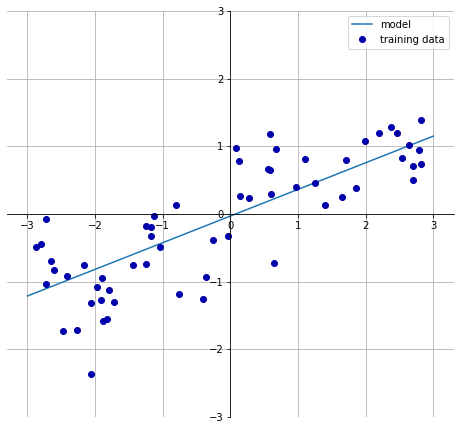

In [4]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

#### Linear regression aka ordinary least squares

Ordinary least squares Linear Regression.
Gauss showed that if the y values have normally distributed noise, then the most likely values of w[0] and b are obtained by minimising the sum of the square of errors.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create a wave dataset as above with 60 samples
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


lr = LinearRegression().fit(X_train, y_train)

In [27]:
# Estimated coefficients for the linear regression problem. Single scalar in this case because X is one dimensional. It is the w parameter
print("lr.coef_:", lr.coef_)
#     Independent term in the linear model. Set to 0.0 if fit_intercept = False. It is the b parameter
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [28]:
# the coefficient of determination R^2 of the prediction. Best possible score is 1 but since we are prediciting waves with line it can't be perfect.
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [9]:
#load boston housing dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


##### Ridge regression
Ridge regression is also a linear regression algorithm.
In addition to fitting to a line we also try to make the coefficients to be as small as possible

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [32]:
#Regularization strength; must be a positive float.
#Regularization improves the conditioning of the problem and reduces the variance of the estimates.
# Larger values specify stronger regularization. 
# In general, stronger regularization parameter should leads to better test score and lower training score. 
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


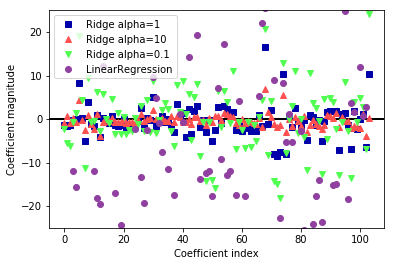

In [34]:
#     Weight vector(s). of different alpha values
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

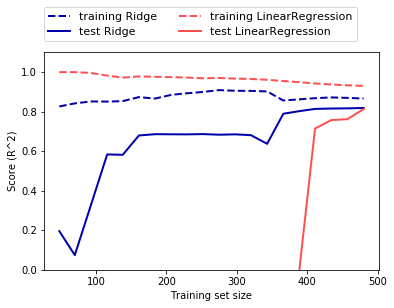

In [35]:
# R^2 improves with training samples.
mglearn.plots.plot_ridge_n_samples()

##### Lasso
(least absolute shrinkage and selection operator)
Also restricts coefficients to  values close to zero but in a different way, called L1 regularisation.
Consequence of L1 - some w[i] are set to zero, which is the same as ignoring the x[i] features
Methods who use the L1 norm are called LASSO

In [13]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of total features:", lasso.coef_ )
print("Number of features used:", np.sum(lasso.coef_ != 0))


Training set score: 0.29
Test set score: 0.21
Number of total features: [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.  

In [37]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

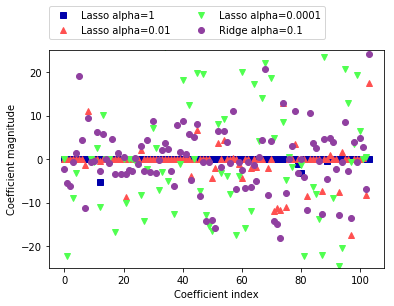

In [39]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")